In [18]:
# Original Dataset: https://www.cs.toronto.edu/~kriz/cifar.html for more information
# # Load of necessary libraries
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.utils import to_categorical
import tensorflow as tf
import keras
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2023-03-28 02:29:10.598779: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-28 02:29:10.599226: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-28 02:29:10.599466: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-28 02:29:10.603306: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-28 02:29:10.603328: I tensorflow/core/co

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3813991895857213249
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7726956544
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4386616170236509021
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [2]:
# to make the example replicable
np.random.seed(42)# Load of the dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 10s 0us/step


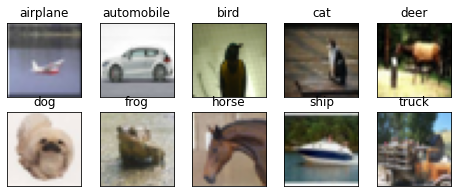

In [3]:
import matplotlib.pyplot as plt
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(len(class_names)):
  ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
  idx = np.where(Y_train[:]==i)[0]
  features_idx = X_train[idx,::]
  img_num = np.random.randint(features_idx.shape[0])
  im = features_idx[img_num,::]
  ax.set_title(class_names[i])
  #im = np.transpose(features_idx[img_num,::], (1, 2, 0))
  plt.imshow(im)
plt.show()

In [4]:
# Initializing the model
model = Sequential()# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))# We add our classificator
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])# Training of the model
model.fit(X_train, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test, to_categorical(Y_test)))# Evaluation of the model
scores = model.evaluate(X_test, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

2023-03-28 01:13:21.277176: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-28 01:13:21.281778: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-28 01:13:21.282000: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-28 01:13:21.282137: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0

Epoch 1/10


2023-03-28 01:13:27.759056: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-03-28 01:13:30.291118: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-03-28 01:13:37.929940: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


391/391 [==============================] - 52s 78ms/step - loss: 4.8397 - accuracy: 0.4877 - val_loss: 1.1736 - val_accuracy: 0.5938
Epoch 2/10
391/391 [==============================] - 26s 66ms/step - loss: 0.8122 - accuracy: 0.7240 - val_loss: 1.0723 - val_accuracy: 0.6339
Epoch 3/10
391/391 [==============================] - 16s 42ms/step - loss: 0.3437 - accuracy: 0.8919 - val_loss: 1.1989 - val_accuracy: 0.6410
Epoch 4/10
391/391 [==============================] - 26s 66ms/step - loss: 0.1030 - accuracy: 0.9732 - val_loss: 1.4060 - val_accuracy: 0.6412
Epoch 5/10
391/391 [==============================] - 20s 51ms/step - loss: 0.0403 - accuracy: 0.9912 - val_loss: 1.5796 - val_accuracy: 0.6408
Epoch 6/10
391/391 [==============================] - 30s 77ms/step - loss: 0.0270 - accuracy: 0.9941 - val_loss: 1.6940 - val_accuracy: 0.6432
Epoch 7/10
391/391 [==============================] - 20s 51ms/step - loss: 0.0298 - accuracy: 0.9927 - val_loss: 1.7538 - val_accuracy: 0.6247
Epo

In [5]:
# Cenetering the data
X_train_mean = np.mean(X_train, axis = 0)
X_train_cent = X_train - X_train_mean# Normalization
X_train_std = np.std(X_train, axis = 0)
X_train_norm = X_train_cent / X_train_std

In [6]:
X_test_norm = (X_test - X_train_mean) / X_train_std

In [7]:
# Initializing the model
model = Sequential()# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))# We add our classificator
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])# Training of the model
model.fit(X_train, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test, to_categorical(Y_test)))# Evaluation of the model
scores = model.evaluate(X_test, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Epoch 1/10
391/391 [==============================] - 28s 69ms/step - loss: 4.4628 - accuracy: 0.4660 - val_loss: 1.2707 - val_accuracy: 0.5516
Epoch 2/10
391/391 [==============================] - 18s 45ms/step - loss: 0.9843 - accuracy: 0.6612 - val_loss: 1.1464 - val_accuracy: 0.6047
Epoch 3/10
391/391 [==============================] - 25s 64ms/step - loss: 0.6087 - accuracy: 0.7946 - val_loss: 1.1295 - val_accuracy: 0.6324
Epoch 4/10
391/391 [==============================] - 28s 71ms/step - loss: 0.2997 - accuracy: 0.9058 - val_loss: 1.2850 - val_accuracy: 0.6324
Epoch 5/10
391/391 [==============================] - 77s 198ms/step - loss: 0.1219 - accuracy: 0.9654 - val_loss: 1.4155 - val_accuracy: 0.6430
Epoch 6/10
391/391 [==============================] - 36s 92ms/step - loss: 0.0524 - accuracy: 0.9879 - val_loss: 1.6113 - val_accuracy: 0.6510
Epoch 7/10
391/391 [==============================] - 34s 85ms/step - loss: 0.0429 - accuracy: 0.9892 - val_loss: 1.8186 - val_accuracy

In [8]:
# We Import Batch Normalizarion layer
from keras.layers import BatchNormalization, Activation# Inizializting the model
model = Sequential()# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))# Defining a thirdd convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))# We include our classifier
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])# Training the model
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test))) # aquí deberíamos usar un conjunto distinto al de test!!!# Evaluating the model
scores = model.evaluate(X_test_norm, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Epoch 1/10
391/391 [==============================] - 46s 118ms/step - loss: 1.4355 - accuracy: 0.5368 - val_loss: 1.3351 - val_accuracy: 0.5535
Epoch 2/10
391/391 [==============================] - 36s 92ms/step - loss: 0.6736 - accuracy: 0.7718 - val_loss: 1.0113 - val_accuracy: 0.6498
Epoch 3/10
391/391 [==============================] - 44s 113ms/step - loss: 0.2658 - accuracy: 0.9293 - val_loss: 0.9829 - val_accuracy: 0.6744
Epoch 4/10
391/391 [==============================] - 65s 166ms/step - loss: 0.0676 - accuracy: 0.9934 - val_loss: 1.0087 - val_accuracy: 0.6831
Epoch 5/10
391/391 [==============================] - 120s 308ms/step - loss: 0.0181 - accuracy: 0.9997 - val_loss: 1.0360 - val_accuracy: 0.6981
Epoch 6/10
391/391 [==============================] - 65s 166ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 1.0691 - val_accuracy: 0.7035
Epoch 7/10
391/391 [==============================] - 50s 128ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.0987 - val_ac

In [10]:
# L2 Regularization# Regularizer layer import
from keras.regularizers import l2# Inizializing the model
model = Sequential()# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))# Classifier inclusion
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(10, activation='softmax'))# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])# Traning the model
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test)))# Evaluating the model
scores = model.evaluate(X_test_norm, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Epoch 1/10
391/391 [==============================] - 35s 89ms/step - loss: 3.7491 - accuracy: 0.4637 - val_loss: 1.5801 - val_accuracy: 0.5082
Epoch 2/10
391/391 [==============================] - 40s 103ms/step - loss: 1.4318 - accuracy: 0.5688 - val_loss: 1.3687 - val_accuracy: 0.5882
Epoch 3/10
391/391 [==============================] - 34s 87ms/step - loss: 1.3204 - accuracy: 0.6106 - val_loss: 1.2946 - val_accuracy: 0.6109
Epoch 4/10
391/391 [==============================] - 40s 102ms/step - loss: 1.2520 - accuracy: 0.6377 - val_loss: 1.2241 - val_accuracy: 0.6470
Epoch 5/10
391/391 [==============================] - 37s 91ms/step - loss: 1.1985 - accuracy: 0.6572 - val_loss: 1.2290 - val_accuracy: 0.6452
Epoch 6/10
391/391 [==============================] - 35s 89ms/step - loss: 1.1565 - accuracy: 0.6733 - val_loss: 1.1966 - val_accuracy: 0.6522
Epoch 7/10
391/391 [==============================] - 36s 91ms/step - loss: 1.1216 - accuracy: 0.6862 - val_loss: 1.1442 - val_accurac

In [11]:
# L1 Regularization# Regularizer layer import
from keras.regularizers import l1# Inizializing the model
model = Sequential()# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))# Classifier inclusion
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(10, activation='softmax'))# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])# Traning the model
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test)))# Evaluating the model
scores = model.evaluate(X_test_norm, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Epoch 1/10
391/391 [==============================] - 84s 214ms/step - loss: 284.2054 - accuracy: 0.2385 - val_loss: 12.9799 - val_accuracy: 0.3001
Epoch 2/10
391/391 [==============================] - 169s 430ms/step - loss: 12.5241 - accuracy: 0.3149 - val_loss: 12.1918 - val_accuracy: 0.3530
Epoch 3/10
391/391 [==============================] - 92s 234ms/step - loss: 12.0254 - accuracy: 0.3566 - val_loss: 11.8927 - val_accuracy: 0.3752
Epoch 4/10
391/391 [==============================] - 97s 249ms/step - loss: 11.7922 - accuracy: 0.3728 - val_loss: 11.7603 - val_accuracy: 0.3980
Epoch 5/10
391/391 [==============================] - 148s 379ms/step - loss: 11.6618 - accuracy: 0.3905 - val_loss: 11.6481 - val_accuracy: 0.3937
Epoch 6/10
391/391 [==============================] - 373s 953ms/step - loss: 11.5678 - accuracy: 0.4008 - val_loss: 11.6050 - val_accuracy: 0.3999
Epoch 7/10
391/391 [==============================] - 131s 334ms/step - loss: 11.5103 - accuracy: 0.4124 - val_los

In [12]:
# Elastic Net Regularization (L1 + L2)# Regularizer layer import
from keras.regularizers import l1_l2# Inizializing the model
model = Sequential()# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))# Classifier inclusion
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_regularizer=l1_l2(0.01, 0.01)))
model.add(Dense(10, activation='softmax'))# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])# Traning the model
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test)))# Evaluating the model
scores = model.evaluate(X_test_norm, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Epoch 1/10


2023-03-28 02:04:17.849860: W tensorflow/tsl/framework/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 338.00MiB (rounded to 354418688)requested by op gradient_tape/dense_10/kernel/Regularizer/Tile
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-03-28 02:04:17.851474: I tensorflow/tsl/framework/bfc_allocator.cc:1034] BFCAllocator dump for GPU_0_bfc
2023-03-28 02:04:17.851489: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (256): 	Total Chunks: 101, Chunks in use: 99. 25.2KiB allocated for chunks. 24.8KiB in use in bin. 944B client-requested in use in bin.
2023-03-28 02:04:17.851493: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (512): 	Total Chunks: 60, Chunks in use: 60. 30.5KiB allocated for chunks. 30.5KiB in use in bin. 30.0KiB client-requested in use in bin.
2023-03-28 02:0

2023-03-28 02:04:27.853734: W tensorflow/tsl/framework/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 338.00MiB (rounded to 354418688)requested by op gradient_tape/dense_10/kernel/Regularizer/Abs/Sign
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-03-28 02:04:27.853811: I tensorflow/tsl/framework/bfc_allocator.cc:1034] BFCAllocator dump for GPU_0_bfc
2023-03-28 02:04:27.853818: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (256): 	Total Chunks: 101, Chunks in use: 101. 25.2KiB allocated for chunks. 25.2KiB in use in bin. 956B client-requested in use in bin.
2023-03-28 02:04:27.853821: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (512): 	Total Chunks: 60, Chunks in use: 60. 30.5KiB allocated for chunks. 30.5KiB in use in bin. 30.0KiB client-requested in use in bin.
2023-03-28

2023-03-28 02:04:37.860285: W tensorflow/tsl/framework/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 338.00MiB (rounded to 354418688)requested by op dense_10/kernel/Regularizer/Abs
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-03-28 02:04:37.860379: I tensorflow/tsl/framework/bfc_allocator.cc:1034] BFCAllocator dump for GPU_0_bfc
2023-03-28 02:04:37.860390: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (256): 	Total Chunks: 101, Chunks in use: 101. 25.2KiB allocated for chunks. 25.2KiB in use in bin. 956B client-requested in use in bin.
2023-03-28 02:04:37.860394: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (512): 	Total Chunks: 60, Chunks in use: 60. 30.5KiB allocated for chunks. 30.5KiB in use in bin. 30.0KiB client-requested in use in bin.
2023-03-28 02:04:37.860397: I

2023-03-28 02:04:47.861544: W tensorflow/tsl/framework/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 338.00MiB (rounded to 354418688)requested by op gradient_tape/dense_10/kernel/Regularizer/mul
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-03-28 02:04:47.861599: I tensorflow/tsl/framework/bfc_allocator.cc:1034] BFCAllocator dump for GPU_0_bfc
2023-03-28 02:04:47.861605: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (256): 	Total Chunks: 101, Chunks in use: 101. 25.2KiB allocated for chunks. 25.2KiB in use in bin. 956B client-requested in use in bin.
2023-03-28 02:04:47.861608: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (512): 	Total Chunks: 60, Chunks in use: 60. 30.5KiB allocated for chunks. 30.5KiB in use in bin. 30.0KiB client-requested in use in bin.
2023-03-28 02:0

ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/dense_10/kernel/Regularizer/Tile' defined at (most recent call last):
    File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/bjbae/.local/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/home/bjbae/.local/lib/python3.8/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/home/bjbae/.local/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/home/bjbae/.local/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/home/bjbae/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 473, in dispatch_queue
      await self.process_one()
    File "/home/bjbae/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 462, in process_one
      await dispatch(*args)
    File "/home/bjbae/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 369, in dispatch_shell
      await result
    File "/home/bjbae/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 664, in execute_request
      reply_content = await reply_content
    File "/home/bjbae/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 355, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/bjbae/.local/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/bjbae/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2854, in run_cell
      result = self._run_cell(
    File "/home/bjbae/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2900, in _run_cell
      return runner(coro)
    File "/home/bjbae/.local/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/bjbae/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3098, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/bjbae/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3301, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/bjbae/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3361, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_335/2906354795.py", line 13, in <cell line: 13>
      model.fit(X_train_norm, to_categorical(Y_train),
    File "/home/bjbae/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/bjbae/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/bjbae/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/home/bjbae/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/bjbae/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/home/bjbae/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/home/bjbae/.local/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/optimizer_v2.py", line 585, in minimize
      grads_and_vars = self._compute_gradients(
    File "/home/bjbae/.local/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/optimizer_v2.py", line 643, in _compute_gradients
      grads_and_vars = self._get_gradients(
    File "/home/bjbae/.local/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/optimizer_v2.py", line 519, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/dense_10/kernel/Regularizer/Tile'
OOM when allocating tensor with shape[86528,1024] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/dense_10/kernel/Regularizer/Tile}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_109283]

In [ ]:
# Elastic Net Regularization (L1 + L2)# Regularizer layer import
from keras.constraints import max_norm# Inizializing the model
model = Sequential()# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))# Classifier inclusion
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_costraint=max_norm(3.)))
model.add(Dense(10, activation='softmax'))# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])# Traning the model
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test)))# Evaluating the model
scores = model.evaluate(X_test_norm, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

In [ ]:
# Dropout# Dropout layer import
from keras.layers import Dropout# Inizializing the model
model = Sequential()# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(0.25))# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))# Classifier inclusion
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])# Traning the model
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test)))# Evaluating the model
scores = model.evaluate(X_test_norm, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

In [ ]:
# Dropout & Max Norm# Dropout & Max Norm layers import
from keras.layers import Dropout
from keras.constraints import max_norm# Inizializing the model
model = Sequential()# Defining a convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(0.25))# Defining a second convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))# Defining a third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))# Classifier inclusion
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_constraint=max_norm(3.)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])# Traning the model
model.fit(X_train_norm, to_categorical(Y_train),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_test_norm, to_categorical(Y_test)))# Evaluating the model
scores = model.evaluate(X_test_norm, to_categorical(Y_test))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])